# <code style="color:Crimson">4. Algorithm Selection</code>

**Note**

* It's typically better to allow more complexity in the model, and then implement other safeguards against overfitting.

* The reason is that if our models are too simple, they can't learn complex patterns no matter how much data you collect.

* However, if your models are more complex, you can use tactics to avoid overfitting. In addition, collecting more data will naturally reduce the chance of overfitting.

#### Let's import the libraries

* When in doubt regarding which Scikit-Learn module something belongs to, refer to this <a href="http://scikit-learn.org/stable/modules/classes.html" target="_blank">documentation page</a>

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

## A. Linear Regression Algorithms

Next, let's import all the 5 algorithms we will be trying for this Linear Regression.

3 **regularized regression** algorithms:<br>
* Lasso
* Ridge
* Elastic-Net

2 **Ensemble Methods**:<br>
* Random Forest Regressor (Since our target variable is continous) - Bagging Technique
* Gradient Boosted Trees (Gradient Boosting Regressor) - Boosting Technique


Read about them in the theory attachment.

In [2]:
# Import Regularized Regression algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#### Next, let's read in the analytical base table.

In [3]:
# Load ABT
df = pd.read_csv('analytical_base_table.csv')
print(df.shape)

(1863, 40)


## 1. Split the Dataset

**Data is a limited resource.** Let's start by splitting our data into training and testing sets. 

* Training sets are used to fit and tune the models.
* Test sets are put aside as "unseen" data to evaluate the models.

In [4]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

For convenience, we should first separate our dataframe into separate objects for our target variable (y) and the input features (x).

In [5]:
# Create separate object for target variable
y = df.tx_price

# Create separate object for input features
x = df.drop('tx_price', axis=1)

Now we can pass x and y to the <code style="color:steelblue">train_test_split()</code> function.

* We'll split x into <code style="color:steelblue">x_train()</code> and <code style="color:steelblue">x_test()</code>.

* We'll split y into <code style="color:steelblue">y_train()</code> and <code style="color:steelblue">y_test()</code>.

* The argument <code style="color:steelblue">test_size = 0.2</code> sets aside 20% of our observations for the test set.

* We use <code style="color:steelblue">random_state = 1234</code> (arbitrary seed) for replicable results.

In [6]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [7]:
#We can confirm we have the right number of observations in each subset.
print( len(x_train), len(x_test), len(y_train), len(y_test) )

1490 373 1490 373


Next, when we train our models, we can fit them on the <code style="color:steelblue">x_train()</code> feature values and <code style="color:steelblue">y_train()</code> target values. 

Finally, when we're ready to evaluate our models on our test set, we would use the trained models to predict <code style="color:steelblue">x_test()</code> and evaluate the predictions against <code style="color:steelblue">y_test()</code>.

## 2. Data Preprocessing

First, let's see the summary statistics from our training data.

In [8]:
x_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,...,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,...,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,...,0.359732,0.024161,0.059060,0.065772,0.119463,0.037584,0.268456,0.065772,0.419463,0.580537
std,1.072914,0.930476,1297.101677,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,...,0.480083,0.153601,0.235817,0.247966,0.324442,0.190252,0.443305,0.247966,0.493637,0.493637
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Notice how the **means** are all over the place.
* The **standard deviations** are also very different from feature to feature.
* This can be a problem for some machine learning algorithms that assume features are all on approximately the same scale.

### **Standardization** is one of the most common preprocessing technique in machine learning.

* **Standardization** transforms all of your features to the same scale by subtracting means and then dividing by standard deviations.
* This makes the feature's distribution **centered around zero, with unit variance**
* Formula for **Z-transform** = (Xi - Mean) / St. deviation

In [9]:
#standardize the training and testing data
from sklearn.preprocessing import StandardScaler

In [10]:
Scale = StandardScaler()

In [11]:
x_train_new = Scale.fit_transform(x_train)

<function matplotlib.pyplot.show(*args, **kw)>

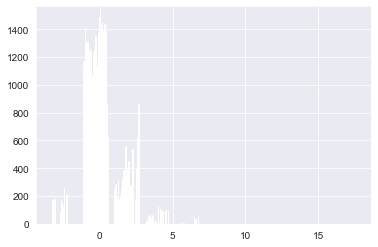

In [12]:
plt.hist(x_train_new)
plt.show

In [13]:
#standardize the test set just like the train set
x_test_new = Scale.fit_transform(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

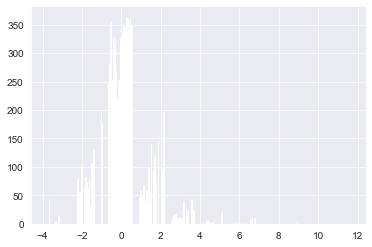

In [14]:
plt.hist(x_test_new)
plt.show

## 3. Creating Pipelines

Scikit-Learn comes with with a handy <code style="color:steelblue">make_pipeline()</code> function. This helps us perform many steps together.

In [15]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [16]:
# For standardization
from sklearn.preprocessing import StandardScaler

In [17]:
# Pipeline with Standardization and Lasso Regression
make_pipeline(StandardScaler(), Lasso(random_state=123))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

**It's convenient to store all of our pipelines in a single dictionary.**

* This makes it easier to stay organized.
* It also makes them easier to access by name later.

For example, we can start by adding the **regularized regression algorithms** into a dictionary:

In [18]:
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
}

For adding a new pipeline:

In [19]:
# Add a pipeline for Elastic-Net
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))

## 4. Tuning Hyperparameters

**Model parameters are properties that define individual models.**

* e.g. regression coefficients
* e.g. decision tree split locations
* They can be learned directly from the training data.

For example, individual Lasso regression models are defined by coefficients for each feature: β0,β1,β2,…
, etc. These coefficients can be learned directly from the data, so they are model parameters.


**Hyperparameters express "higher-level" structural information about modeling algorithms.**
* e.g. strength of the penalty used in regularized regression
* e.g. the number of trees to include in a random forest
* They are set before training the model because they cannot be learned directly from the training data.
* The key distinction is that model parameters can be learned directly from the training data while hyperparameters are not.

For example, Lasso regression also has a regularization term that penalizes complexity. The "strength" of that penalty, λ (or alpha in sklearn), can't be learned directly from the data because the penalty actually influences the way the algorithm learns. You must set the penalty strength before training the model, so it's a **hyperparameter.**

Because hyperparameters cannot be learned directly from the data, you must find a way to **tune** them systematically. There are different methods of doing so, but the most reliable one is **cross-validation.**

**But first, you must first decide on the hyperparameters to tune, along with which values to try.**
* If you have a pipeline object, you can list its tunable hyperparameters using the <code style="color:steelblue">.get_params()</code> method.


In [20]:
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso',
   Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=123,
         selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=123,
       selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.

All of the keys that begin with <code style="color:crimson">'lasso__'</code> are hyperparameters.

#### We do not need to tune all of those hyperparameters. 

For **Lasso and Ridge regularized regression**, we can tune <code style="color:steelblue">alpha</code> (strength of penalty)

* <code style="color:steelblue">alpha</code> is a positive value, typically between 0 and 10.
* For Lasso Regression, by default <code style="color:steelblue">l1_ratio = 1</code>
* For Ridge Regression, by default <code style="color:steelblue">l1_ratio = 0</code>

<br>
<br>

For **Elastic Nets**, we can tune <code style="color:steelblue">alpha</code> and <code style="color:steelblue">l1_ratio</code>.

<code style="color:steelblue">l1_ratio</code> is the ratio of L1 penalty to L2 penalty, and the default is 0.5.

* For enet, let's try values for <code style="color:steelblue">l1_ratio</code> between 0.1 and 0.9, in increments of 0.2.

In [21]:
#lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

#elasticnet hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

Let's compile all of their hyperparameter grids into a single dictionary, similar to the one for pipelines.

In [22]:
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters
}

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with **cross-validation.**

First, we'll need to import a helper for cross-validation called <code style="color:steelblue">GridSearchCV</code>.
* As its name implies, this class performs cross-validation on a hyperparameter grid.
* It will try each combination of hyperparameter values in the grid.
* It neatly wraps the entire cross-validation process together.

In [23]:
#Helper for cross-validation
from sklearn.model_selection import GridSearchCV

Understanding how **cross-validation works:**

Here's how the new 10-fold cross-validation process would look when it includes preprocessing:<br>
1. Split your data into 10 equal folds.<br>
2. Preprocess 9 training folds, learning the preprocessing parameters.<br>
3. Train your model on the same 9 folds.<br>
4. Preprocess the hold-out fold using the same preprocessing parameters from step (2).<br>
5. Evaluate your model on the same hold-out fold.<br>
6. Perform steps **(2) - (5)** 10 times, each time holding out a different fold.<br>
7. Average the performance across all 10 folds.<br>

For example, here's how we'd do it for Lasso regression.
* First, we pass in the Lasso pipeline as the first argument.<br>
<font style="color:gray">model = GridSearchCV( <font style="color:steelblue">pipelines['lasso']</font>,  hyperparameters['lasso'],  cv=10, n_jobs=-1)</font><br>



* Next, we pass in the Lasso hyperparameters we want to tune.<br>
<font style="color:gray">model = GridSearchCV(pipelines['lasso'], <font style="color:steelblue">hyperparameters['lasso']</font>, cv=10, n_jobs=-1)</font><br>



* Then, we pass in the predefined folds into the cv= argument.<br>
<font style="color:gray">model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], <font style="color:steelblue">cv=10</font>, n_jobs=-1)</font><br>



* Finally, we'll save the entire cross-validation object as our "model."<br>
<font style="color:steelblue">model = GridSearchCV</font><font style="color:gray">(pipelines['lasso'], hyperparameters['lasso'], cv=10)</font><br>

In [24]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
LassoModel = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10)

In [25]:
type(LassoModel)

sklearn.model_selection._search.GridSearchCV

In [26]:
#now fit and tune the lasso model
LassoModel.fit(x_train, y_train)

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8257416668633.154, tolerance: 3171319297.0949426
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6868714106391.094, tolerance: 3194896688.490519
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8668539074992.783, tolerance: 3183820378.677522
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You m

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1774276797853.6133, tolerance: 3199239181.733935
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1631951581524.3027, tolerance: 3187730175.357665
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1605338242369.9492, tolerance: 3191666696.9098926
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108286129552.07812, tolerance: 3177859706.3300605
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114945395811.56836, tolerance: 3140540684.931256
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389861239915.66797, tolerance: 3116650208.450078
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=123,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
       

In [27]:
# Create cross-validation object from Ridge pipeline and Ridge hyperparameters
RidgeModel = GridSearchCV(pipelines['ridge'], hyperparameters['ridge'], cv=10)

In [28]:
type(LassoModel)

sklearn.model_selection._search.GridSearchCV

In [29]:
#now fit and tune the ridge model
RidgeModel.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False, random_state=123,
                                              solver='auto', tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [30]:
# Create cross-validation object from enet pipeline and enet hyperparameters
EnetModel = GridSearchCV(pipelines['enet'], hyperparameters['enet'], cv=10)

In [31]:
type(LassoModel)

sklearn.model_selection._search.GridSearchCV

In [32]:
#now fit and tune the enet model
EnetModel.fit(x_train, y_train)

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9577086193106.025, tolerance: 3171319297.0949426
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9265902017472.287, tolerance: 3194896688.490519
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9462673564411.947, tolerance: 3183820378.677522
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You m

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9244632511302.643, tolerance: 3194896688.490519
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9452951053525.936, tolerance: 3183820378.677522
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9676346922519.775, tolerance: 3199239181.733935
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You mi

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8732602621855.641, tolerance: 3199239181.733935
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8643835640089.1875, tolerance: 3187730175.357665
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7812186131080.971, tolerance: 3191666696.9098926
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You 

/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9389753834963.166, tolerance: 3191666696.9098926
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9284688903282.36, tolerance: 3151492508.06799
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9483137046007.268, tolerance: 3177859706.3300605
  positive)
/Users/swapnil/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You mi

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=123,
                                                   selection='cyclic',
                           

## 5. Model Evaluation

Finally, it's time to evaluate our models and pick the best one.

**One of the first ways to evaluate the models is by looking at their cross-validated performance on the training set.**

* The cross-validated performance can be accessed with the best\_score_ attribute for each fitted model.
* Those scores are **holdout $R^2$** scores



For regression problems, the default scoring metric is $R^2$

* In rough terms, $R^2$ is the "percent of the variance in the target variable that can be explained by the model."
* Because holdout $R^2$ is the average $R^2$ from the holdout folds during cross-validation, higher is almost always better.

In [33]:
#Print Scores for all the models
print('Lasso Model:', LassoModel.best_score_)
print('Ridge Model:', RidgeModel.best_score_)
print('Enet Model:', EnetModel.best_score_)

Lasso Model: 0.3086275080420003
Ridge Model: 0.3166111585985648
Enet Model: 0.3428746287380323


let's see how the models perform on our test set. To predict the test set, we can just call <code style="color:steelblue">.predict(x_test)</code>

In [34]:
# Fit model on test set
LassoPred = LassoModel.predict(x_test)
RidgePred = RidgeModel.predict(x_test)
EnetPred = EnetModel.predict(x_test)

## 6. Performance Metrics Score

Another metric that would be especially useful for this problem is **Mean Absolute Error, or MAE.**
* Remember, our **success criteria** for this project is predicting within $70,000 of true transaction prices, on average.
* Mean absolute error (or MAE) is the average absolute difference between predicted and actual values for our target variable.
* So we need to get MAE below 70,000.


In [35]:
#Import performance matrices for evaluating models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [36]:
# Calculate and print R^2 and MAE for Lasso
print('Lasso Score')
print( 'R^2:', r2_score(y_test, LassoPred ))
print( 'MAE:', mean_absolute_error(y_test, LassoPred))

Lasso Score
R^2: 0.4088862501934907
MAE: 85035.54212406879


In [37]:
# Calculate and print R^2 and MAE for Ridge
print('Ridge Score')
print( 'R^2:', r2_score(y_test, RidgePred ))
print( 'MAE:', mean_absolute_error(y_test, RidgePred))

Ridge Score
R^2: 0.4093396476329717
MAE: 84978.03564808935


In [38]:
# Calculate and print R^2 and MAE for Enet
print('Enet Score')
print( 'R^2:', r2_score(y_test, EnetPred ))
print( 'MAE:', mean_absolute_error(y_test, EnetPred))

Enet Score
R^2: 0.4052451372948348
MAE: 86298.63725401454


## ~ For Fun ~

We'll just put those values in a pandas dataframe to make it visually appealing

In [39]:
data = [['0.408','0.409', '0.405'],['85035.54','84978.03','86298.63']]

In [40]:
df = pd.DataFrame(data, columns=['Lasso','Ridge','Enet'], index=['R2 Score','MAE'] )

In [41]:
df

,Lasso,Ridge,Enet
R2 Score,0.408,0.409,0.405
MAE,85035.54,84978.03,86298.63


## B. Tree Algorithms

#### Let's add  <code style="color:SteelBlue">RandomForestRegressor</code> and  <code style="color:SteelBlue">GradientBoostingRegressor</code> to our pipelines.

In [42]:
pipelines['rf'] = make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

#### Let's start by declaring the hyperparameter grid for our random forest.

The first one we'll tune is <code style="color:steelblue; font-weight:bold">n_estimators</code>.
* This is the number of decision trees to include in the random forest.
* Usually, more is better.
* The default value is 10, which is usually too few.
* Let's try 100 and 200.

The second one we'll tune is <code style="color:steelblue; font-weight:bold">max_features</code>.
* This controls the number of features each tree is allowed to choose from.
* It's what allows your random forest to perform feature selection.
* The default value is <code style="color:crimson">'auto'</code>, which sets <code style="color:steelblue">max_features = n_features</code>.
* Let's also try <code style="color:crimson">'sqrt'</code>, which sets <code style="color:steelblue">max_features = sqrt(n_features)</code>
* And <code style="color:crimson">0.33</code>, which sets <code style="color:steelblue">max_features = 0.33 * n_features</code>


In [43]:
# Random forest hyperparameters
rf_hyperparameters = {'randomforestregressor__n_estimators': [100, 200],
'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]  
}

Next, let's declare hyperparameter settings for boosted tree.

* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__learning_rate'</span>: [0.05, 0.1, 0.2]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__max_depth'</span>: [1, 3, 5]</code>

In [46]:
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

Let's compile the hyperparameter grids into a single dictionary.

In [47]:
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [48]:
hyperparameters

{'lasso': {'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
 'ridge': {'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
 'enet': {'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
  'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
 'rf': {'randomforestregressor__n_estimators': [100, 200],
  'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
 'gb': {'gradientboostingregressor__n_estimators': [100, 200],
  'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
  'gradientboostingregressor__max_depth': [1, 3, 5]}}

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with **cross-validation.**

In [49]:
# Create cross-validation object from RandomForest pipeline and RandomForest hyperparameters
RFModel = GridSearchCV(pipelines['rf'], hyperparameters['rf'], cv=10)

In [50]:
#now fit and tune the RandomForest model
RFModel.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [51]:
# Create cross-validation object from GradientBoosting pipeline and GradientBoosting hyperparameters
GBModel = GridSearchCV(pipelines['gb'], hyperparameters['gb'], cv=10)

In [52]:
#now fit and tune the GradientBoosting model
GBModel.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(alpha=0.9,
                                                                  ccp_alpha=0.0,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
              

## Model Evaluation

In [56]:
# Fit the model on test set
RFPred = RFModel.predict(x_test)
GBPred = GBModel.predict(x_test)

#### Let's display the cross-validated training performance for both the models

In [57]:
#Print Scores for both the models
print('RandomForest Model:', RFModel.best_score_)
print('GradientBoosting Model:', GBModel.best_score_)

RandomForest Model: 0.4813165126237962
GradientBoosting Model: 0.4876362055706826


In [58]:
# Calculate and print R^2 and MAE for RandomForest
print('RandomForest Score')
print( 'R^2:', r2_score(y_test, RFPred ))
print( 'MAE:', mean_absolute_error(y_test, RFPred))

RandomForest Score
R^2: 0.5698034267683483
MAE: 68118.31983914209


In [59]:
# Calculate and print R^2 and MAE for GradientBoosting
print('GradientBoosting Score')
print( 'R^2:', r2_score(y_test, GBPred ))
print( 'MAE:', mean_absolute_error(y_test, GBPred))

GradientBoosting Score
R^2: 0.5400684768585471
MAE: 70614.01362199895


#### While picking the winning model check:
* Which model had the highest $R^2$ on the test set?
* Which model had the lowest mean absolute error?
* Are these two models the same one?
* Did it also have the best holdout $R^2$ score from cross-validation?


## ~ For Fun ~

We'll put those values in the 'df' dataframe to make it visually appealing.

In [60]:
df

,Lasso,Ridge,Enet
R2 Score,0.408,0.409,0.405
MAE,85035.54,84978.03,86298.63


In [89]:
df['Random Forest']=['0.569','68118.31']
df['Gradient Boosting'] = ['0.540','70614.01']

In [90]:
df

,Lasso,Ridge,Enet,Random Forest,Gradient Boosting
R2 Score,0.408,0.409,0.405,0.569,0.540
MAE,85035.54,84978.03,86298.63,68118.31,70614.01


## The WINNER is Random Forest Regressor
* highest R2 score and 
* transaction price < $70,000

In [91]:
#the winning hyperparameters values for Random Forest Regressor are:
RFModel.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)

* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto'</span></code>

#### Finally save the model to disk. To do so, we'll import a helpful package called <code style="color:steelblue">pickle</code>, which saves Python objects to disk.
* First, <code>import pickle</code>.
* Then, use the following syntax to "dump" your model into a pickle file.


In [93]:
import pickle

In [95]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(RFModel, open(filename, 'wb'))